In [ ]:
"""
# 04 - Model Evaluation

This notebook evaluates trained models comprehensively.
"""

# Cell 1: Imports
import sys
from pathlib import Path

project_root = Path().resolve().parent
sys.path.insert(0, str(project_root))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from src.data.data_loader import load_sample_data
from src.data.data_preprocessing import DataPreprocessor
from src.models.train import ModelTrainer
from src.models.evaluate import ModelEvaluator
from src.utils.helpers import setup_logging, set_random_seed, load_pickle

setup_logging(log_level="INFO")
set_random_seed(42)
%matplotlib inline

# Cell 2: Load Data and Models
# Prepare test data
df = load_sample_data()
preprocessor = DataPreprocessor()
df_clean = preprocessor.clean_data(df)
df_features = preprocessor.create_features(df_clean)

train_df, test_df = train_test_split(df_features, test_size=0.2, random_state=42)
X_train, y_train = preprocessor.prepare_features(train_df, fit=True)
X_test, y_test = preprocessor.prepare_features(test_df, fit=False)

# Train models
trainer = ModelTrainer()
trainer.train_all_models(X_train, y_train, tune_hyperparameters=False)

print(f"Test set size: {len(y_test)}")

# Cell 3: Evaluate All Models
evaluator = ModelEvaluator()
comparison_df = evaluator.evaluate_all_models(trainer.models, X_test, y_test)

print("\nModel Comparison:")
print(comparison_df.to_string(index=False))

# Cell 4: Predictions Plot
evaluator.plot_predictions()

# Cell 5: Model Comparison
evaluator.plot_model_comparison(metrics=['rmse', 'mae', 'r2'])

# Cell 6: Residual Analysis
best_name, _ = trainer.select_best_model(X_test, y_test)
evaluator.plot_residuals(best_name)

# Cell 7: Error Distribution
evaluator.plot_error_distribution(best_name)

# Cell 8: Generate Report
report = evaluator.generate_report()
print(report)

# Cell 9: Summary
print("="*60)
print("EVALUATION SUMMARY")
print("="*60)
best_metrics = comparison_df.iloc[0]
print(f"\nBest Model: {best_metrics['model']}")
print(f"RMSE: {best_metrics['rmse']:,.2f}")
print(f"MAE: {best_metrics['mae']:,.2f}")
print(f"R² Score: {best_metrics['r2']:.4f}")

In [1]:
# Cell 1: Imports
import sys
from pathlib import Path

project_root = Path().resolve().parent
sys.path.insert(0, str(project_root))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from src.data.data_loader import load_sample_data
from src.data.data_preprocessing import DataPreprocessor
from src.models.train import ModelTrainer
from src.models.evaluate import ModelEvaluator
from src.utils.helpers import setup_logging, set_random_seed, load_pickle

setup_logging(log_level="INFO")
set_random_seed(42)
%matplotlib inline

2025-11-27 15:26:02 | INFO     | helpers:set_random_seed:241 - Random seed set to 42


In [2]:
# Cell 2: Load Data and Models
# Prepare test data
df = load_sample_data()
preprocessor = DataPreprocessor()
df_clean = preprocessor.clean_data(df)
df_features = preprocessor.create_features(df_clean)

train_df, test_df = train_test_split(df_features, test_size=0.2, random_state=42)
X_train, y_train = preprocessor.prepare_features(train_df, fit=True)
X_test, y_test = preprocessor.prepare_features(test_df, fit=False)

# Train models
trainer = ModelTrainer()
trainer.train_all_models(X_train, y_train, tune_hyperparameters=False)

print(f"Test set size: {len(y_test)}")

2025-11-27 15:26:05 | INFO     | data_loader:load_sample_data:333 - Created sample data with 10 rows
2025-11-27 15:26:05 | INFO     | config_loader:__init__:47 - Configuration loaded from D:\practice-1\src\config\config.yaml
2025-11-27 15:26:05 | INFO     | data_preprocessing:__init__:46 - DataPreprocessor initialized
2025-11-27 15:26:05 | INFO     | data_preprocessing:clean_data:59 - Starting data cleaning. Initial shape: (10, 11)
2025-11-27 15:26:05 | INFO     | data_preprocessing:_remove_outliers:236 - Removed 2 outlier rows (20.00%)
2025-11-27 15:26:05 | INFO     | data_preprocessing:clean_data:81 - Data cleaning completed. Final shape: (8, 11)
2025-11-27 15:26:05 | INFO     | data_preprocessing:create_features:266 - Feature creation completed. New shape: (8, 13)
2025-11-27 15:26:05 | INFO     | data_preprocessing:prepare_features:305 - Numerical features: ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'car_age']
2025-11-27 15:26:05 | INFO     | data_preprocessing

Test set size: 2


In [3]:
# Cell 3: Evaluate All Models
evaluator = ModelEvaluator()
comparison_df = evaluator.evaluate_all_models(trainer.models, X_test, y_test)

print("\nModel Comparison:")
print(comparison_df.to_string(index=False))

2025-11-27 15:26:20 | INFO     | evaluate:__init__:51 - ModelEvaluator initialized
2025-11-27 15:26:20 | INFO     | evaluate:evaluate_all_models:189 - Evaluating 3 models
2025-11-27 15:26:20 | INFO     | evaluate:evaluate_model:72 - Evaluating model: linear_regression
2025-11-27 15:26:20 | INFO     | evaluate:_log_metrics:160 - 
2025-11-27 15:26:20 | INFO     | evaluate:_log_metrics:161 - Evaluation Results for linear_regression
2025-11-27 15:26:20 | INFO     | evaluate:_log_metrics:162 - ==================================================
2025-11-27 15:26:20 | INFO     | evaluate:_log_metrics:163 - RMSE:              209,922.44
2025-11-27 15:26:20 | INFO     | evaluate:_log_metrics:164 - MAE:               196,510.60
2025-11-27 15:26:20 | INFO     | evaluate:_log_metrics:165 - R² Score:          0.4173
2025-11-27 15:26:20 | INFO     | evaluate:_log_metrics:166 - MAPE:              20.70%
2025-11-27 15:26:20 | INFO     | evaluate:_log_metrics:167 - Median AE:         196,510.60
2025-11-


Model Comparison:
            model          rmse          mae        r2      mape    rmsle    median_ae     max_error  explained_variance
linear_regression 209922.440627 196510.60357  0.417290 20.701127 0.233353 196510.60357 270341.584624            0.927920
          xgboost 297901.638102 292167.68750 -0.173493 32.597321 0.398973 292167.68750 350334.937500            0.955260
    random_forest 480175.525814 399162.50000 -2.048840 37.926496 0.594785 399162.50000 666066.666667            0.058012


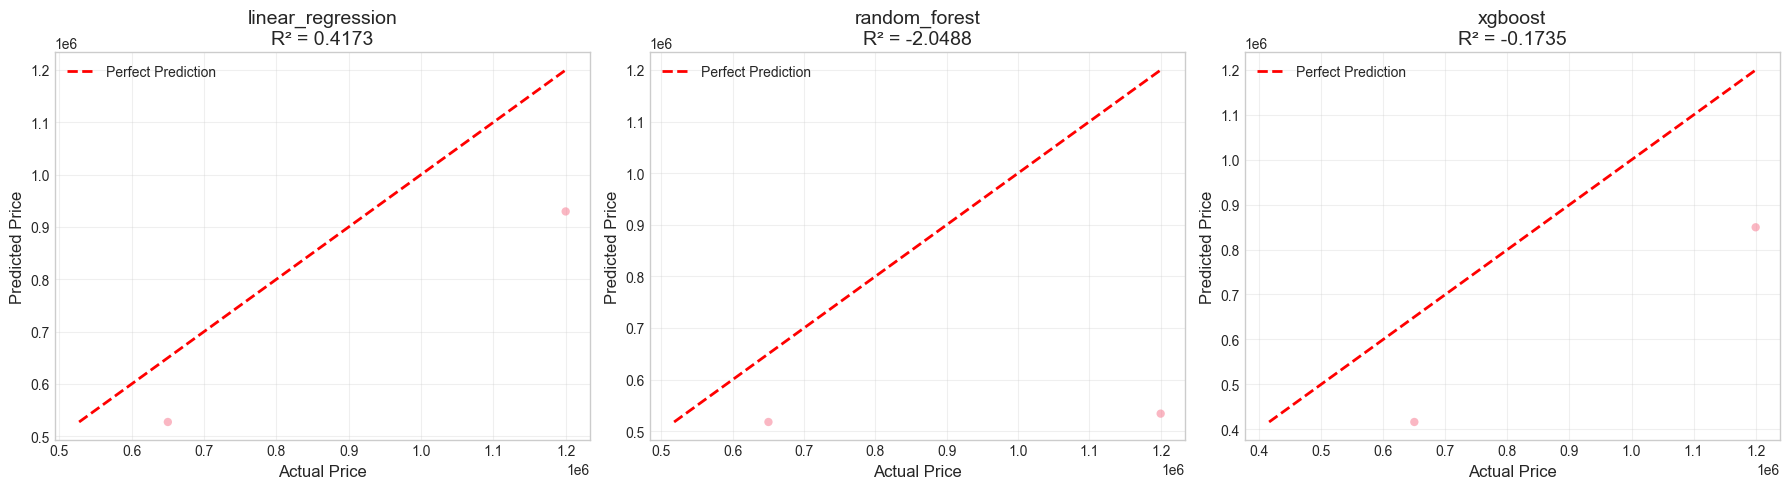

In [4]:
# Cell 4: Predictions Plot
evaluator.plot_predictions()

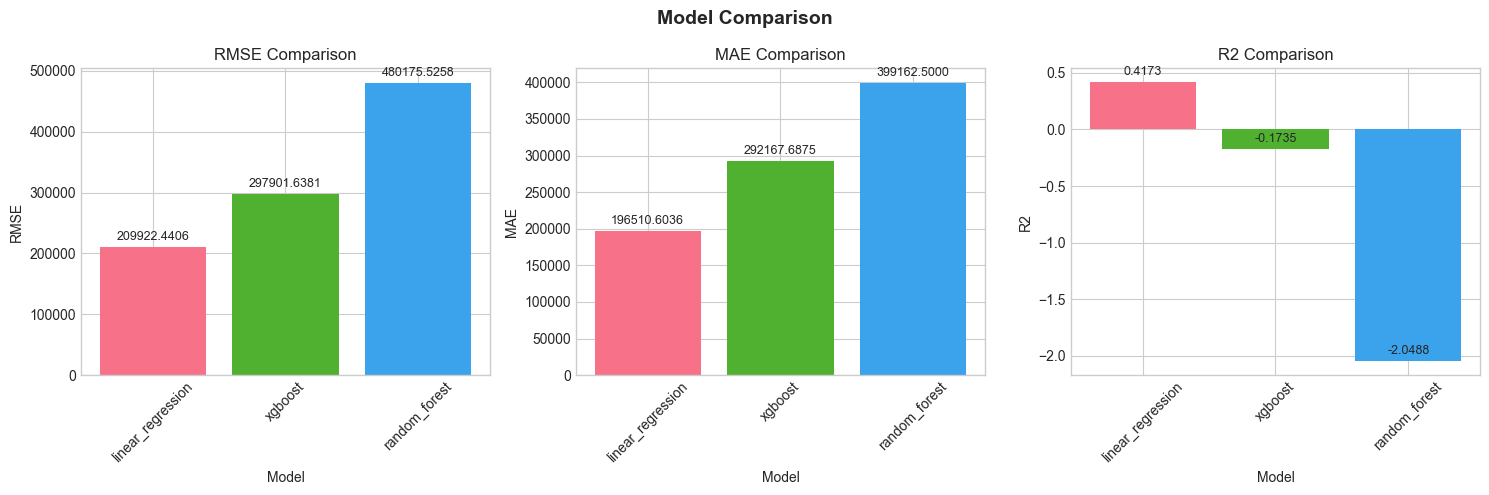

In [5]:
# Cell 5: Model Comparison
evaluator.plot_model_comparison(metrics=['rmse', 'mae', 'r2'])

2025-11-27 15:26:30 | INFO     | train:select_best_model:433 - Best model: linear_regression with RMSE: 95998.3015


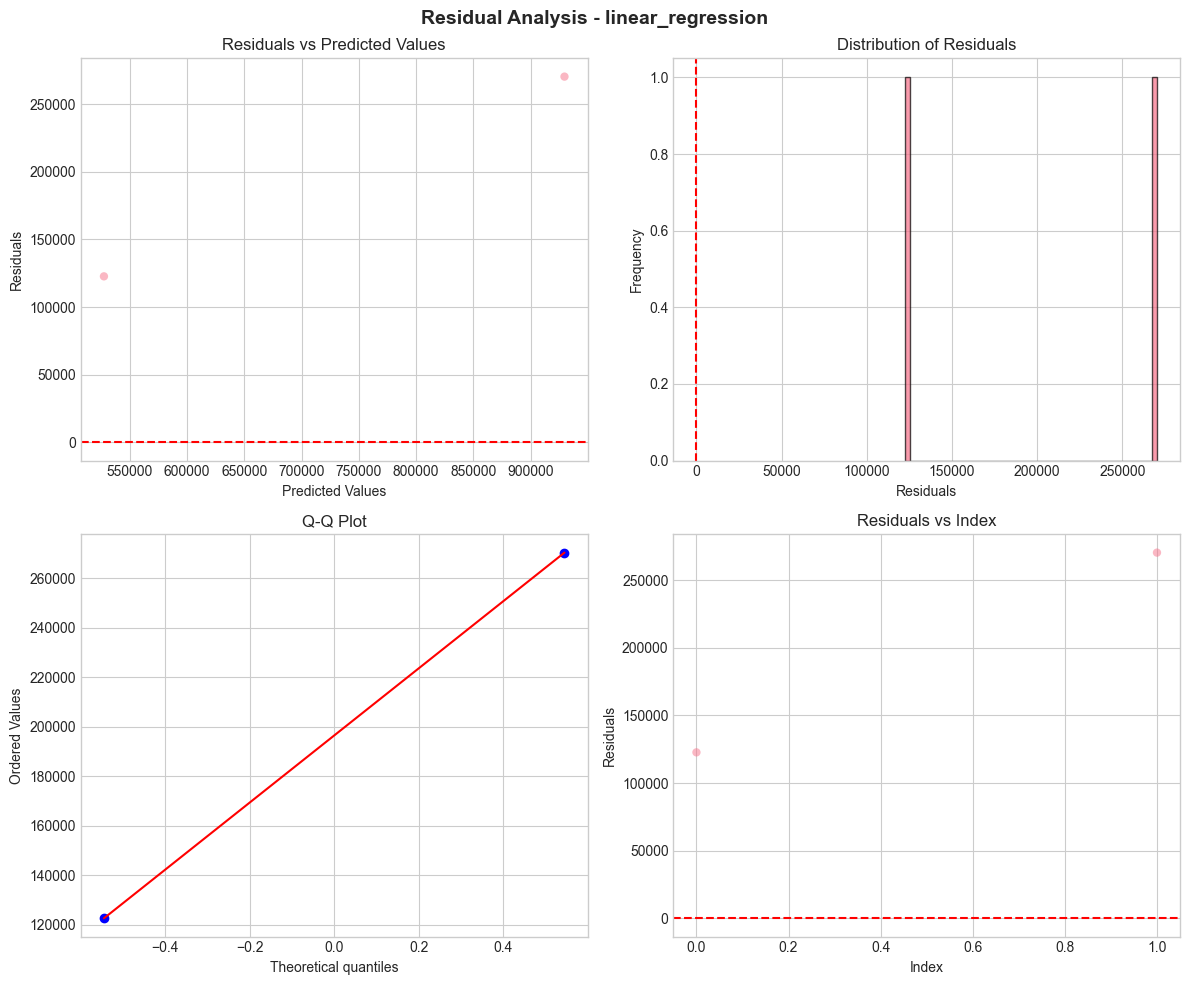

In [6]:
# Cell 6: Residual Analysis
best_name, _ = trainer.select_best_model(X_test, y_test)
evaluator.plot_residuals(best_name)

D:\practice-1\src\models\evaluate.py:477: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  error_summary = error_by_range.groupby('price_range')['absolute_error'].mean()


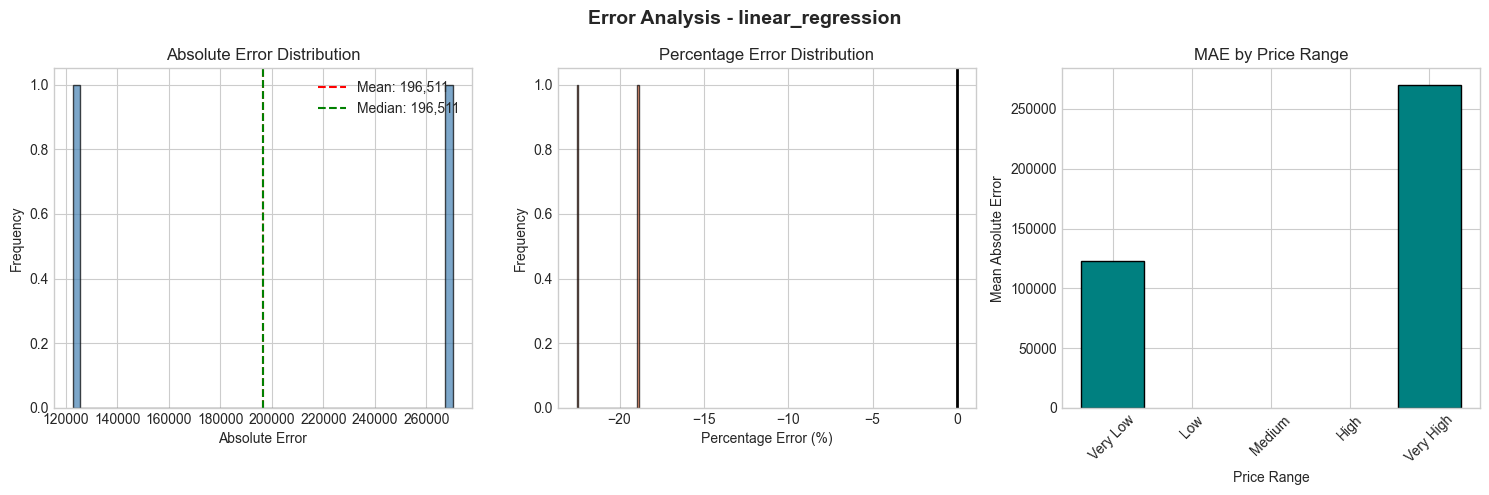

In [7]:
# Cell 7: Error Distribution
evaluator.plot_error_distribution(best_name)

In [8]:
# Cell 8: Generate Report
report = evaluator.generate_report()
print(report)

# Model Evaluation Report

## Summary
Number of models evaluated: 3

**Best Model:** linear_regression
- RMSE: 209,922.44
- MAE: 196,510.60
- R² Score: 0.4173

## Detailed Results

### Model Comparison Table

| model             |   rmse |    mae |        r2 |    mape |    rmsle |   median_ae |   max_error |   explained_variance |
|:------------------|-------:|-------:|----------:|--------:|---------:|------------:|------------:|---------------------:|
| linear_regression | 209922 | 196511 |  0.41729  | 20.7011 | 0.233353 |      196511 |      270342 |            0.92792   |
| xgboost           | 297902 | 292168 | -0.173493 | 32.5973 | 0.398973 |      292168 |      350335 |            0.95526   |
| random_forest     | 480176 | 399162 | -2.04884  | 37.9265 | 0.594785 |      399162 |      666067 |            0.0580121 |

### linear_regression

- RMSE: 209,922.44
- MAE: 196,510.60
- R2: 0.4173
- MAPE: 20.70%
- RMSLE: 0.2334
- MEDIAN_AE: 196,510.60
- MAX_ERROR: 270,341.58
- EXPLAINED_VARIAN

In [9]:
# Cell 9: Summary
print("="*60)
print("EVALUATION SUMMARY")
print("="*60)
best_metrics = comparison_df.iloc[0]
print(f"\nBest Model: {best_metrics['model']}")
print(f"RMSE: {best_metrics['rmse']:,.2f}")
print(f"MAE: {best_metrics['mae']:,.2f}")
print(f"R² Score: {best_metrics['r2']:.4f}")

EVALUATION SUMMARY

Best Model: linear_regression
RMSE: 209,922.44
MAE: 196,510.60
R² Score: 0.4173
